Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

Expected visualization Output:

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

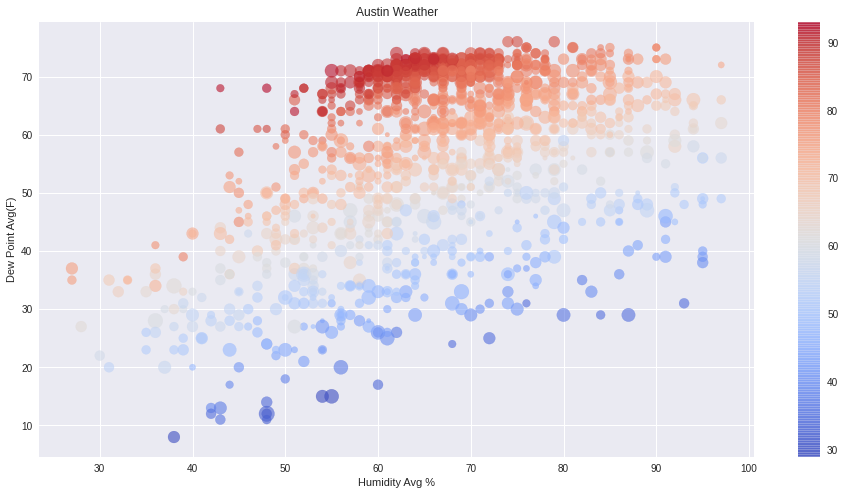

In [ ]:
''' Harap 2 kali running cell, run cell 1 akan menghasilkan error dan yang ke 2 akan berhasil'''

warna = df['TempAvgF']
size = df['WindAvgMPH'] * 20

# Mengubah tipe data Object menjadi Float
df.replace('-', np.nan, inplace=True)
df.fillna(method='ffill')
df['DewPointAvgF'] = df['DewPointAvgF'].astype(float)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].astype(float)
df['WindAvgMPH'] = df['WindAvgMPH'].astype(float)

# Visualisasi Data yang telah di ubah 
fig, ax = plt.subplots(figsize = (16, 8))

axmap = ax.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], alpha=0.6, c=warna, cmap='coolwarm', s=size)
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg(F)')
ax.set_title('Austin Weather')
fig.colorbar(axmap)
plt.show()

Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

#### Jawab pada text cell disini

pada grafik di atas bisa di simpulkan cuaca di austin pada saat ini sedang mengalami cuaca yang cukup panas, karena hampir kebanyakan terpusat di angka 70-90C. tetapi untuk di beberapa wilayah austin justru mengalami cuaca yang cukup dingin di kisaran 30-40C

<h2>Soal 2: Preparing Data</h2>

Manipulasi data di bawah dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

Silahkan Download  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [3]:
dataset = pd.read_csv('/content/sample_data/vgsales.csv')

In [4]:
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
mean_sales = dataset.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
mean_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan data yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

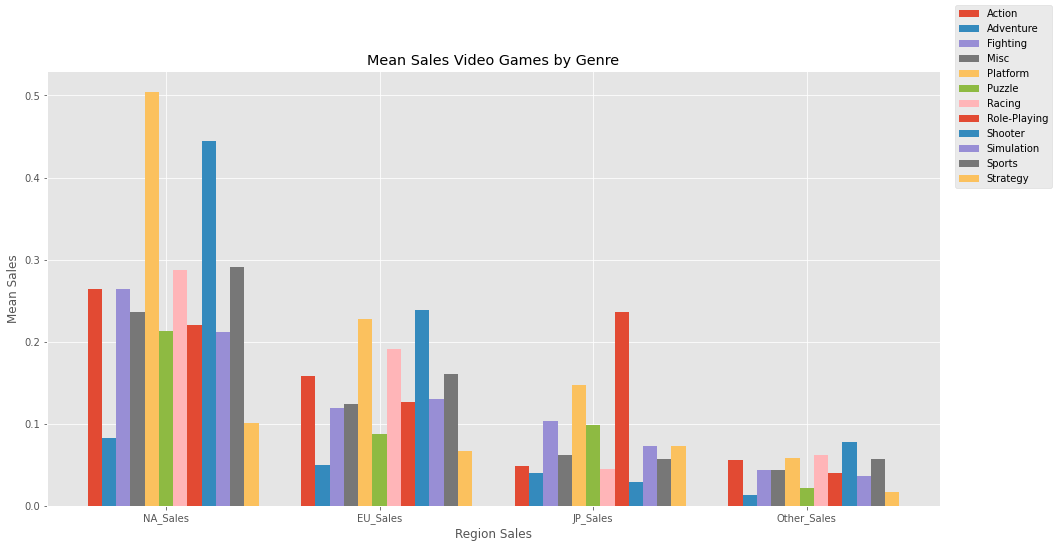

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(0, 12, 3)
x0 = 0

for row in mean_sales.iterrows():
  ax.bar(x + x0, row[1], width=0.2, label=row[0])
  x0 += 0.2

ax.set_xticks(x+1)
ax.set_xticklabels(mean_sales.columns)

ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games by Genre')
fig.legend()
plt.show()

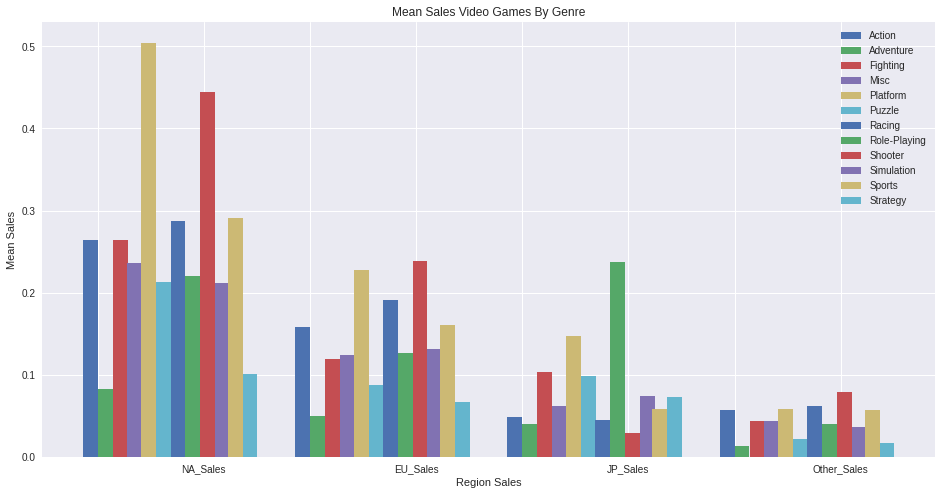

In [ ]:
subjects = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
indx = np.arange(len(subjects))
mean_label = np.arange(0, 4)

y1 = list(mean_sales.T['Action'])
y2 = list(mean_sales.T['Adventure'])
y3 = list(mean_sales.T['Fighting'])
y4 = list(mean_sales.T['Misc'])
y5 = list(mean_sales.T['Platform'])
y6 = list(mean_sales.T['Puzzle'])
y7 = list(mean_sales.T['Racing'])
y8 = list(mean_sales.T['Role-Playing'])
y9 = list(mean_sales.T['Shooter'])
y10 = list(mean_sales.T['Simulation'])
y11 = list(mean_sales.T['Sports'])
y12 = list(mean_sales.T['Strategy'])
# print(mean_sales.T)
bar_width = 0.070

fig, ax = plt.subplots(figsize=(16, 8))
plt.style.use('seaborn')

action = ax.bar(indx - bar_width/2, y1, bar_width, label='Action')
adventure = ax.bar(indx + bar_width/2, y2, bar_width, label='Adventure')
fighting = ax.bar(indx + bar_width/0.66, y3, bar_width, label='Fighting')
misc = ax.bar(indx + bar_width/0.40, y4, bar_width, label='Misc')
platform = ax.bar(indx + bar_width/0.29, y5, bar_width, label='Platform')
puzzle = ax.bar(indx + bar_width/0.225, y6, bar_width, label='Puzzle')
racing = ax.bar(indx + bar_width/0.185, y7, bar_width, label='Racing')
role = ax.bar(indx + bar_width/0.156, y8, bar_width, label='Role-Playing')
shooter = ax.bar(indx + bar_width/0.135, y9, bar_width, label='Shooter')
simulator = ax.bar(indx + bar_width/0.119, y10, bar_width, label='Simulation')
sports = ax.bar(indx + bar_width/0.108, y11, bar_width, label='Sports')
strategy = ax.bar(indx + bar_width/0.0975, y12, bar_width, label='Strategy')

# ax.set_xticklabels([0] + list(subjects)) <-- Original
# ax.set_xtick(indx)
ax.set_xticklabels([0] + [' '] + ['NA_Sales'] + [' '] + ['EU_Sales'] + [' '] + ['JP_Sales'] + [' '] + ['Other_Sales']) # <-- Custom Sendiri
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games By Genre')
plt.legend()
plt.show()

Jawab:

#### Berikan insights yg didapat di text cell ini dari visualisasi yang didapat 

dari tabel yang di tampilkan di atas terlihat bahwa di regional NA melebihi dari penjualan yang berada di beberapa regional lainnya.

di regional NA game yang paling laris yaitu game dengan bergenre Platform dan Shooter sedangkan di regional lainnya seperti di regional JP genre game yang paling laris jatuh kepada genre game role-playing.

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan data yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)

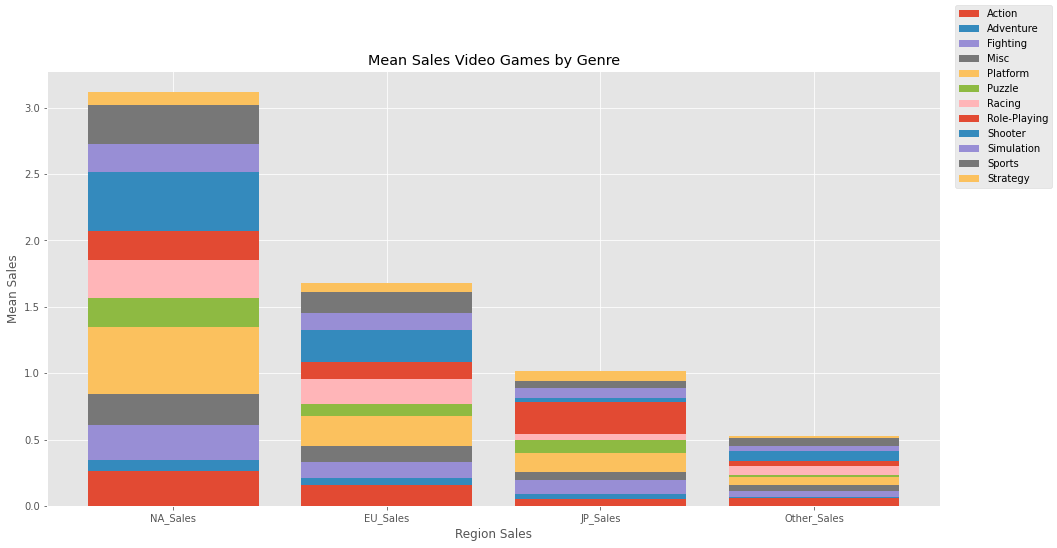

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16,8))

x = np.arange(4)
bottom = [0, 0, 0, 0]

for row in mean_sales.iterrows():
  ax.bar(x, row[1], label=row[0], bottom=bottom)
  bottom += row[1]

ax.set_xticks(x)
ax.set_xticklabels(mean_sales.columns)
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games by Genre')
fig.legend()
plt.show()

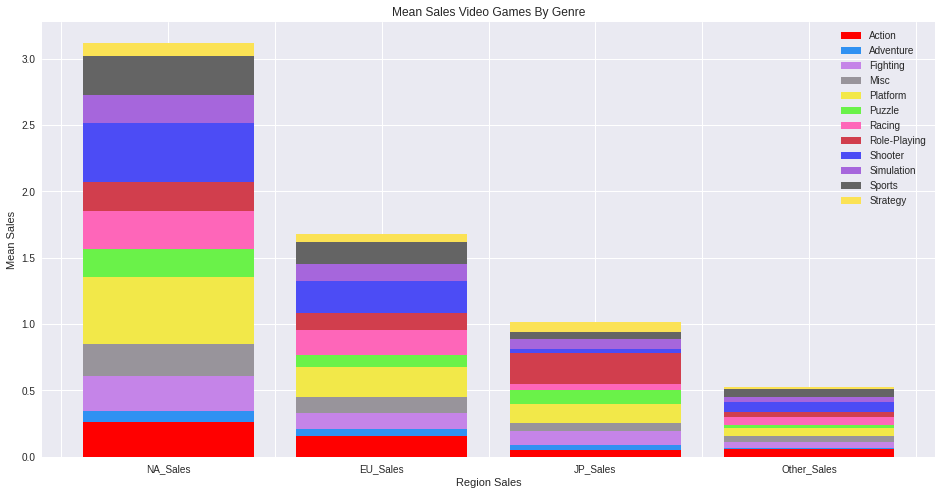

In [ ]:
indx = np.arange(len(subjects))
# mean_label = np.arange(0, 4)

y1 = list(mean_sales.T['Action'])
y2 = list(mean_sales.T['Adventure'])
y3 = list(mean_sales.T['Fighting'])
y4 = list(mean_sales.T['Misc'])
y5 = list(mean_sales.T['Platform'])
y6 = list(mean_sales.T['Puzzle'])
y7 = list(mean_sales.T['Racing'])
y8 = list(mean_sales.T['Role-Playing'])
y9 = list(mean_sales.T['Shooter'])
y10 = list(mean_sales.T['Simulation'])
y11 = list(mean_sales.T['Sports'])
y12= list(mean_sales.T['Strategy'])
# print(mean_sales.T)
width = 0.8

fig, ax = plt.subplots(figsize=(16, 8))
plt.style.use('seaborn')

ax.bar(indx, y1, label='Action', color='red', width=width)
ax.bar(indx, y2, label='Adventure', bottom=y1, color='#3091F2', width=width)
ax.bar(indx, y3, label='Fighting', bottom=np.add(y1,y2), color='#C584E8', width=width)
ax.bar(indx, y4, label='Misc', bottom=np.add(np.add(y2,y3),y1), color='#98949B', width=width)
ax.bar(indx, y5, label='Platform', bottom=np.add(np.add(np.add(y4,y3),y2),y1), color='#F2E849', width=width)
ax.bar(indx, y6, label='Puzzle', bottom=np.add(np.add(np.add(np.add(y5,y4),y3),y2),y1), color='#6AF249', width=width)
ax.bar(indx, y7, label='Racing', bottom=np.add(np.add(np.add(np.add(np.add(y6,y5),y4),y3),y2),y1), color='#FE66B9', width=width)
ax.bar(indx, y8, label='Role-Playing', bottom=np.add(np.add(np.add(np.add(np.add(np.add(y7,y6),y5),y4),y3),y2),y1), color='#D13E4D', width=width)
ax.bar(indx, y9, label='Shooter', bottom=np.add(np.add(np.add(np.add(np.add(np.add(np.add(y8,y7),y6),y5),y4),y3),y2),y1), color='#4C4CF5', width=width)
ax.bar(indx, y10, label='Simulation', bottom=np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(y9,y8),y7),y6),y5),y4),y3),y2),y1), color='#A666DC', width=width)
ax.bar(indx, y11, label='Sports', bottom=np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(y10,y9),y8),y7),y6),y5),y4),y3),y2),y1), color='#646464', width=width)
ax.bar(indx, y12, label='Strategy', bottom=np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(np.add(y11,y10),y9),y8),y7),y6),y5),y4),y3),y2),y1), color='#FBE255', width=width)

# ax.set_xticklabels([0] + list(subjects)) <-- Original
# ax.set_xtick(indx)
ax.set_xticklabels([0] + [' '] + ['NA_Sales'] + [' '] + ['EU_Sales'] + [' '] + ['JP_Sales'] + [' '] + ['Other_Sales']) # <-- Custom Sendiri
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games By Genre')
plt.legend()
plt.show()

Jawab:

#### Berikan insights yg didapat di text cell ini dari visualisasi yang didapat 

dari hasil visualisasi yang di tampilkan di atas penjualan di regional NA cukup berbuah manis di karenakan penjualan di NA bisa 2 kali lipat dari penjualan dari regional EU dan 3 kali lipat dari penjualan dari regional JP.

oleh karena itu pemasaran video games di regional NA sudah sangat tepat. tinggal meningkatkan penjualan video games di beberapa regional lainnya.